In [4]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [7]:
# Read/Import Dataset
df = pd.read_csv('data/thyroid.csv')

In [9]:
df.head()

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]


In [11]:
df.drop('other',inplace=True,axis=1)

In [12]:
df.head()

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,?,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,?,f,?,f,?,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,11,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,36,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803048]


### **Features Columns are mentioned as below--**
 ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'target']

In [22]:
feature_cols = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'target']

In [23]:
df.columns = feature_cols

In [24]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,?,f,?,f,?,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,11,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,36,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803048]


### **Splitting Target**

Now we can check that the target columns contain many categorical names with some indicative numbers, so we will split them with the respective features.

#### Thyroid.names File Content

The diagnosis consists of a string of letters indicating diagnosed conditions. A diagnosis of "-" indicates no condition requiring comment. A diagnosis of the form "X|Y" is interpreted as "consistent with X, but more likely Y". The conditions are divided into groups where each group corresponds to a class of comments.

**Attribute Name** | **Possible Values**
------------------ | ------------------
age                | continuous
sex                | M, F
on thyroxine       | f, t
query on thyroxine | f, t
on antithyroid medication | f, t
sick               | f, t
pregnant           | f, t
thyroid surgery    | f, t
I131 treatment     | f, t
query hypothyroid   | f, t
query hyperthyroid  | f, t
lithium            | f, t
goitre             | f, t
tumor              | f, t
hypopituitary      | f, t
psych              | f, t
TSH measured       | f, t
TSH                | continuous
T3 measured        | f, t
T3                 | continuous
TT4 measured       | f, t
TT4                | continuous
T4U measured       | f, t
T4U                | continuous
FTI measured       | f, t
FTI                | continuous
TBG measured       | f, t
TBG                | continuous
referral source    | WEST, STMW, SVHC, SVI, SVHD, other

The diagnosis consists of a string of letters indicating diagnosed conditions. A diagnosis of "-" indicates no condition requiring comment. A diagnosis of the form "X|Y" is interpreted as "consistent with X, but more likely Y". The conditions are divided into groups where each group corresponds to a class of comments.

**Letter** | **Diagnosis**
---------- | -------------
**Hyperthyroid Conditions** | 
A         | hyperthyroid
B         | T3 toxic
C         | toxic goitre
D         | secondary toxic
**Hypothyroid Conditions** | 
E         | hypothyroid
F         | primary hypothyroid
G         | compensated hypothyroid
H         | secondary hypothyroid
**Binding Protein** | 
I         | increased binding protein
J         | decreased binding protein
**General Health** | 
K         | concurrent non-thyroidal illness
**Replacement Therapy** | 
L         | consistent with replacement therapy
M         | underreplaced
N         | overreplaced
**Antithyroid Treatment** | 
O         | antithyroid drugs
P         | I131 treatment
Q         | surgery
**Miscellaneous** | 
R         | discordant assay results
S         | elevated TBG
T         | elevated thyroid hormones

In experiments with an earlier version of this archive, decision trees were derived for the most frequent classes of comments, namely:

- Hyperthyroid conditions (A, B, C, D)
- Hypothyroid conditions (E, F, G, H)
- Binding protein (I, J)
- General health (K)
- Replacement therapy (L, M, N)
- Discordant results (R)


In [25]:
target = df.target

In [35]:
target.str.split('([A-Za-z]+)',expand=True)[1].unique()

array([None, 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C', 'O', 'LJ', 'H', 'D', 'GK', 'MI', 'P', 'FK',
       'B', 'GI', 'GKJ', 'OI', 'E'], dtype=object)

In [38]:
target = target.str.split('([A-Za-z]+)',expand=True)[1].replace({None:'Z'})
df.target = target

In [39]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,?,f,?,f,?,Z
1,41,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,11,Z
2,36,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,Z
3,32,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,36,S
4,60,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,Z


In [41]:
# Hence None is removed from the Target Column
df.target.unique()

array(['Z', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C', 'O', 'LJ', 'H', 'D', 'GK', 'MI', 'P', 'FK',
       'B', 'GI', 'GKJ', 'OI', 'E'], dtype=object)

#### **Now we want to impute the NULL values but in this NULL values are represented by the "?"**
so first we convert the "?" in the NULL values

In [42]:
df = df.replace(['?'],np.nan)
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,NaN,f,NaN,f,NaN,Z
1,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,11,Z
2,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,26,Z
3,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,36,S
4,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,26,Z


In [43]:
df.isnull().sum()

age                             0
sex                           307
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3_measured                     0
T3                           2603
TT4_measured                    0
TT4                           441
T4U_measured                    0
T4U                           808
FTI_measured                    0
FTI                           801
TBG_measured                    0
TBG                          8822
target                          0
dtype: int64

**Here we can see the TBG has more null observations it will tremendously occur problem, so we can remove and some of the other feautre rows which is not useful**

['TBG_measured','TBG','T3_measured','TSH measured','TT4_measured','T4U_measured','FTI_measured']

In [44]:
df.drop(['TBG_measured','TBG','T3_measured','TSH measured','TT4_measured','T4U_measured','FTI_measured'],axis=1,inplace=True)

In [45]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.6,1.9,128,NaN,NaN,Z
1,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
2,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
3,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,S
4,60,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z


In [46]:
df.isnull().sum()

age                             0
sex                           307
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2603
TT4                           441
T4U                           808
FTI                           801
target                          0
dtype: int64

In [47]:
df['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [48]:
# Replacing the Female with 2 and Male with 1
df.sex.replace({'F':2,'M':1},inplace=True)

In [50]:
round_sex_Values = round(df.sex.mean())
df.sex.fillna(round_sex_Values,inplace=True)

df.sex.unique()

array([2., 1.])

In [51]:

df.isnull().sum()

age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2603
TT4                           441
T4U                           808
FTI                           801
target                          0
dtype: int64

In [56]:
df.dtypes

age                            int64
sex                          float64
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH                           object
T3                            object
TT4                           object
T4U                           object
FTI                           object
target                        object
dtype: object

#### Converting the Numerical columns that are object in the data types back into the  original data types

In [57]:
cols = ['TSH','T3','TT4','T4U','FTI']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.dtypes)

age                            int64
sex                          float64
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
target                        object
dtype: object


In [58]:
# now we will impute the null values with knn imputer
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=3)

In [59]:
cols = ['TSH','T3','TT4','T4U','FTI']
for col in cols:
    df[col] = knnimp.fit_transform(df[[col]])

In [62]:
# Now we can see there is no null values

df.isnull().sum() 

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
target                       0
dtype: int64

In [63]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9171 non-null   int64  
 1   sex                        9171 non-null   float64
 2   on_thyroxine               9171 non-null   object 
 3   query_on_thyroxine         9171 non-null   object 
 4   on_antithyroid_medication  9171 non-null   object 
 5   sick                       9171 non-null   object 
 6   pregnant                   9171 non-null   object 
 7   thyroid_surgery            9171 non-null   object 
 8   I131_treatment             9171 non-null   object 
 9   query_hypothyroid          9171 non-null   object 
 10  query_hyperthyroid         9171 non-null   object 
 11  lithium                    9171 non-null   object 
 12  goitre                     9171 non-null   object 
 13  tumor                      9171 non-null   objec

## **Exploratory Data Analysis (EDA)**

In [67]:
# Separate numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Separate categorical columns
categorical_df = df.select_dtypes(include=['object'])

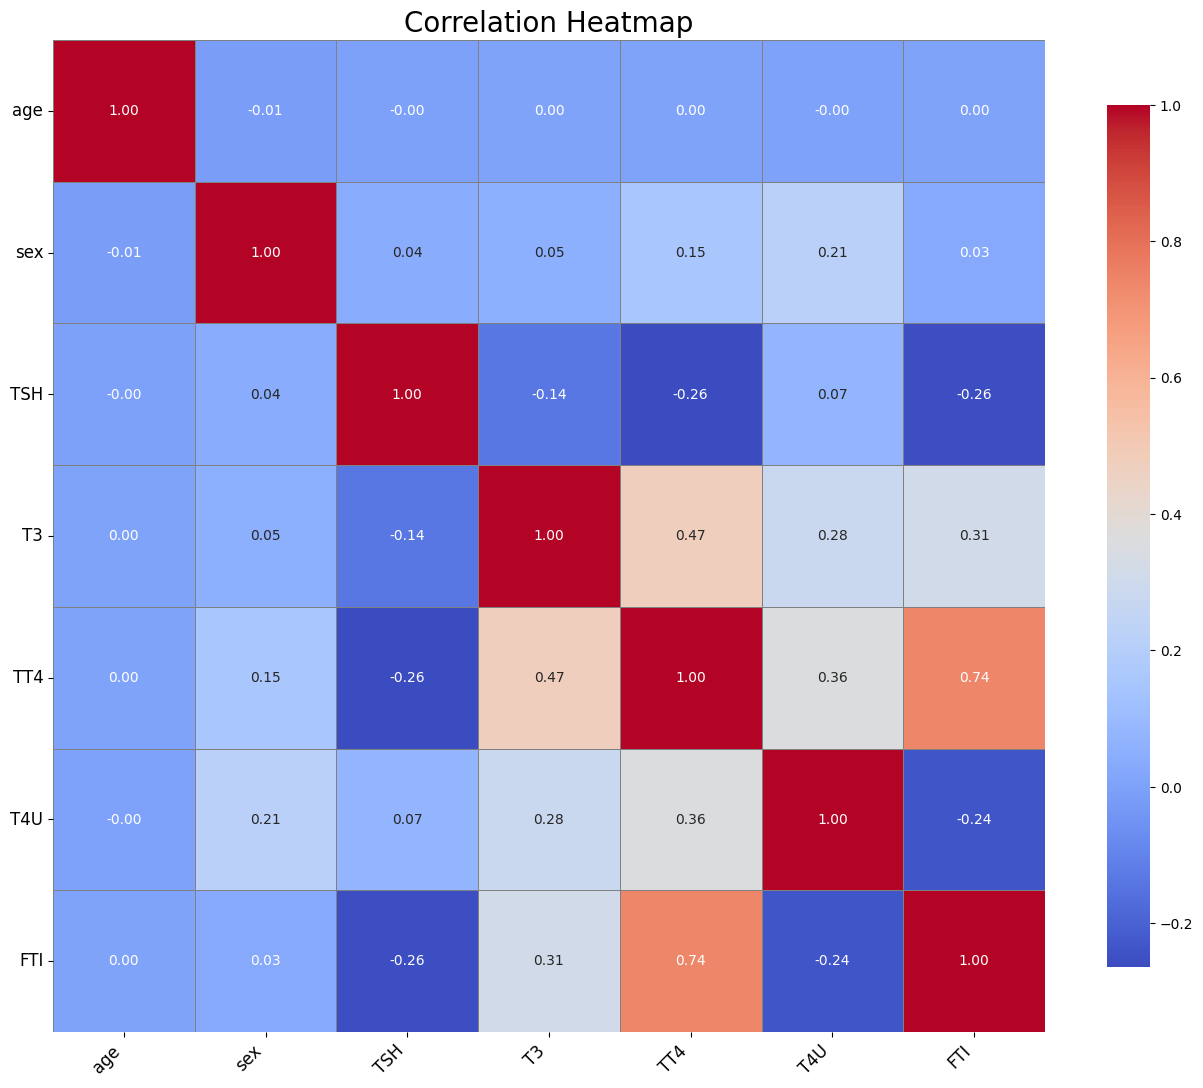

In [70]:
plt.figure(figsize=(16, 14))

sns.heatmap(
    numeric_df.corr(),        # Data to plot
    annot=True,               # Show values in each cell
    cmap='coolwarm',          # Color map for better contrast
    fmt='.2f',                # Format for the annotation
    linewidths=.5,            # Width of the lines that divide the cells
    linecolor='gray',         # Color of the lines that divide the cells
    annot_kws={"size": 10},   # Size of the annotations
    cbar_kws={"shrink": .8},  # Color bar properties
    square=True               # Make the heatmap square-shaped
)

plt.title('Correlation Heatmap', size=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [73]:
numeric_df.corr()

,age,sex,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.014175,-0.003979,0.003693,0.004122,-0.002045,0.004108
sex,-0.014175,1.000000,0.036723,0.048890,0.150479,0.214723,0.030149
TSH,-0.003979,0.036723,1.000000,-0.136613,-0.264756,0.072962,-0.257901
T3,0.003693,0.048890,-0.136613,1.000000,0.471792,0.281336,0.312401
TT4,0.004122,0.150479,-0.264756,0.471792,1.000000,0.362280,0.738279
T4U,-0.002045,0.214723,0.072962,0.281336,0.362280,1.000000,-0.238927
FTI,0.004108,0.030149,-0.257901,0.312401,0.738279,-0.238927,1.000000


In [76]:
# Labelling the categorical values into the Numerical Values each column so that to gain a proper corrleation feature 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [84]:
# Encode categorical columns
for col in categorical_df.columns:
    try:
        categorical_df[col] = le.fit_transform(categorical_df[col].astype(str))
    except Exception as e:
        print(f"Error encoding column {col}: {e}")


In [85]:
categorical_df.corr()

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,target
on_thyroxine,1.000000,0.008248,-0.010513,-0.047850,0.010490,0.018289,0.071485,0.112228,-0.031070,-0.005011,0.002150,-0.009141,0.015756,-0.065004,0.018541
query_on_thyroxine,0.008248,1.000000,-0.014743,-0.007791,0.017560,0.005424,-0.017847,-0.015136,-0.029375,-0.013184,0.014286,-0.005432,0.113387,-0.028464,0.002965
on_antithyroid_medication,-0.010513,-0.014743,1.000000,-0.022344,0.024048,-0.005651,0.006257,-0.026853,0.101698,-0.011456,-0.010882,-0.018594,-0.001672,-0.024734,-0.002553
sick,-0.047850,-0.007791,-0.022344,1.000000,-0.021449,-0.009691,-0.027049,0.005464,-0.027752,-0.008525,-0.018980,-0.003730,-0.002916,-0.032134,0.012535
pregnant,0.010490,0.017560,0.024048,-0.021449,1.000000,-0.004768,-0.014887,-0.021448,0.064867,-0.010997,0.032190,0.102761,-0.001605,-0.014006,-0.109325
thyroid_surgery,0.018289,0.005424,-0.005651,-0.009691,-0.004768,1.000000,0.003586,-0.000685,0.019421,-0.012325,-0.011708,0.002719,-0.001798,-0.026610,0.029545
I131_treatment,0.071485,-0.017847,0.006257,-0.027049,-0.014887,0.003586,1.000000,0.052636,0.044211,-0.013868,-0.013174,-0.022509,-0.002024,-0.029942,-0.000133
query_hypothyroid,0.112228,-0.015136,-0.026853,0.005464,-0.021448,-0.000685,0.052636,1.000000,0.015709,-0.010242,-0.017033,-0.025700,-0.004008,-0.036547,-0.061339
query_hyperthyroid,-0.031070,-0.029375,0.101698,-0.027752,0.064867,0.019421,0.044211,0.015709,1.000000,-0.019502,-0.026577,0.028914,-0.004082,-0.054299,-0.077486
lithium,-0.005011,-0.013184,-0.011456,-0.008525,-0.010997,-0.012325,-0.013868,-0.010242,-0.019502,1.000000,-0.009731,-0.016628,-0.001495,0.071808,0.022893


In [88]:
# Now merge the Numerical_df and Categorical_df together in a dataset back
new_df = pd.concat([numeric_df, categorical_df], axis=1)
new_df.head()

,age,sex,TSH,T3,TT4,T4U,FTI,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,target
0,29,2.0,1.600000,1.900000,128.000000,0.976056,113.640746,0,0,0,...,0,0,0,0,0,0,0,0,0,29
1,41,2.0,5.218993,1.970629,108.700305,0.976056,113.640746,0,0,0,...,0,0,0,1,0,0,0,0,0,29
2,36,2.0,5.218993,1.970629,108.700305,0.976056,113.640746,0,0,0,...,0,0,0,0,0,0,0,0,0,29
3,32,2.0,5.218993,1.970629,108.700305,0.976056,113.640746,0,0,0,...,0,0,0,0,0,0,0,0,0,28
4,60,2.0,5.218993,1.970629,108.700305,0.976056,113.640746,0,0,0,...,0,0,0,0,0,0,0,0,0,29


In [89]:
# now we can see their is correlation in some features
for a in range(len(new_df.corr())):
    for b in range(a):
        if((new_df.corr().iloc[a,b]) >= 0.7):
            print(new_df.corr().columns[b])

TT4


In [90]:
# Since TT4 has high correlation among all we can remove

new_df.drop('TT4',axis=1,inplace=True)

In [91]:
new_df.head()

,age,sex,TSH,T3,T4U,FTI,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,...,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,target
0,29,2.0,1.600000,1.900000,0.976056,113.640746,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
1,41,2.0,5.218993,1.970629,0.976056,113.640746,0,0,0,0,...,0,0,0,1,0,0,0,0,0,29
2,36,2.0,5.218993,1.970629,0.976056,113.640746,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
3,32,2.0,5.218993,1.970629,0.976056,113.640746,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
4,60,2.0,5.218993,1.970629,0.976056,113.640746,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29


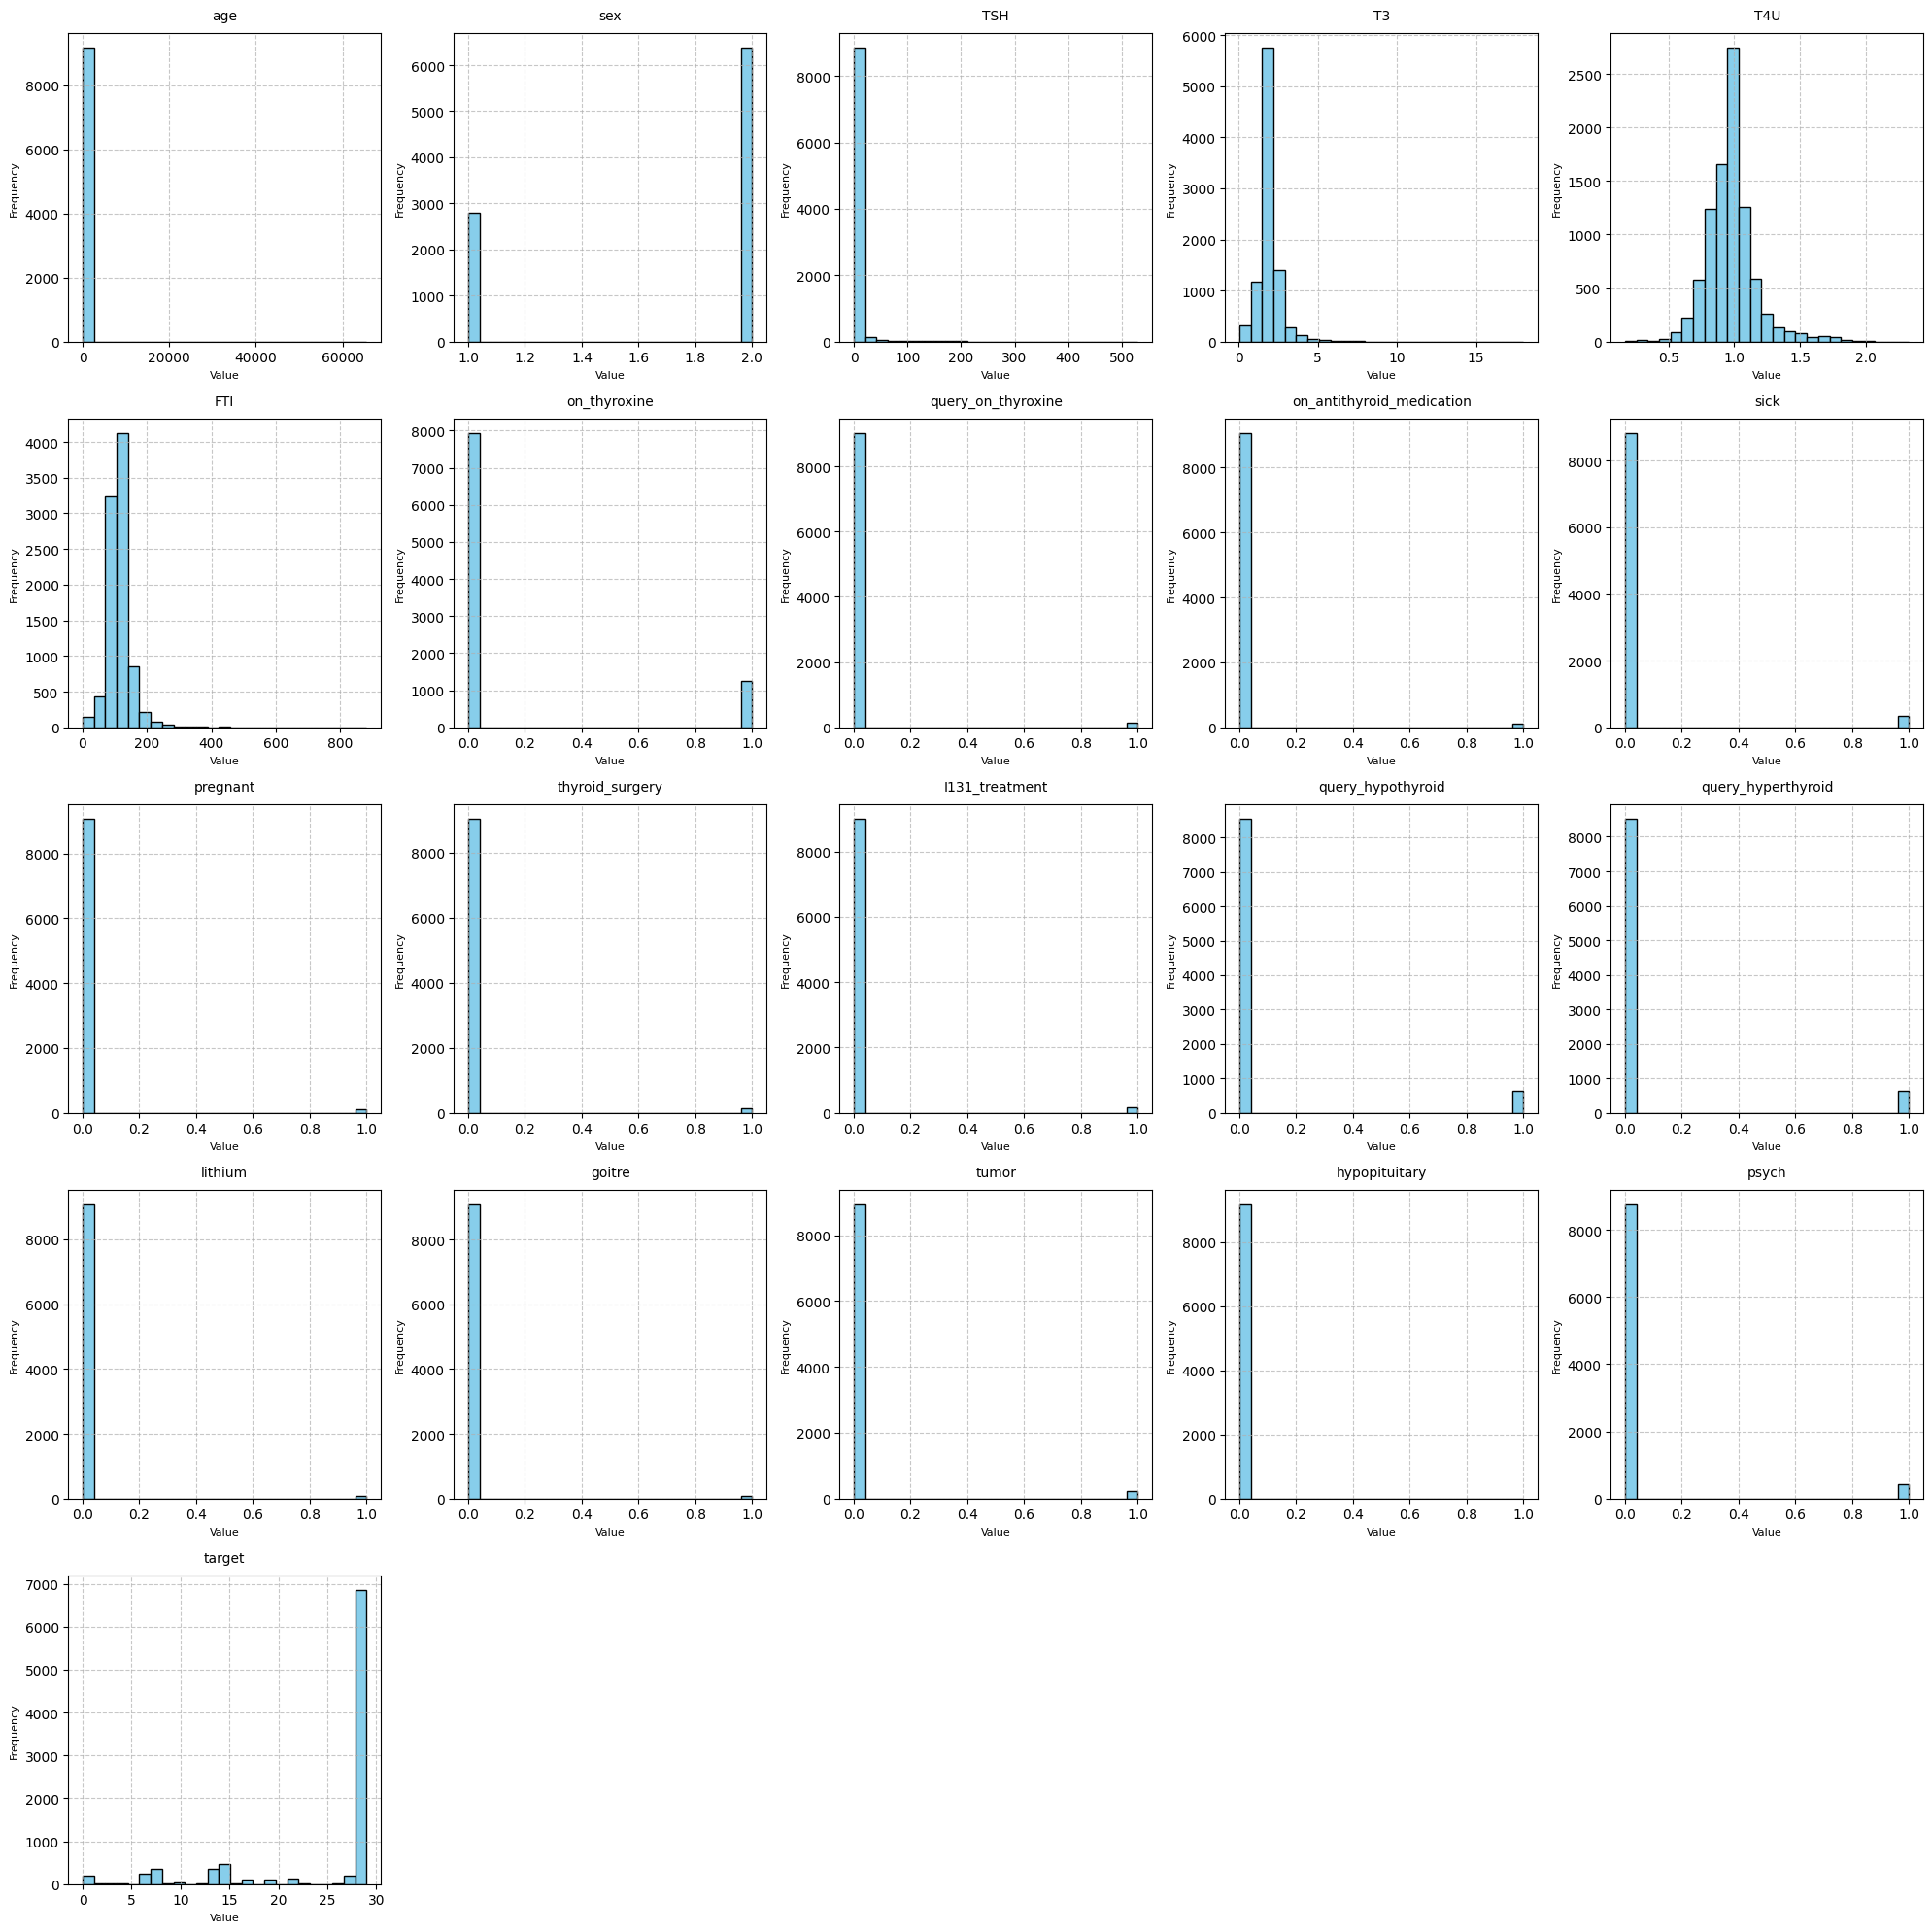

In [96]:
# Define the number of columns in the subplot grid
num_cols = 5  # Number of columns in the subplot grid
num_rows = int(np.ceil(len(new_df.columns) / num_cols))  # Calculate number of rows needed

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4 * num_rows), sharex=False, sharey=False)
axes = axes.flatten()

for i, col in enumerate(new_df.columns):
    axes[i].hist(new_df[col], bins=25, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col}', fontsize=10, pad=10)
    axes[i].set_xlabel('Value', fontsize=8)
    axes[i].set_ylabel('Frequency', fontsize=8)
    axes[i].grid(True, linestyle='--', alpha=0.7)

for j in range(len(new_df.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Now we can see the data normally distributed in some features and some are categorigal now we have to normalize the values for the Numerical columns only

In [106]:
new_df.columns

Index(['age', 'sex', 'TSH', 'T3', 'T4U', 'FTI', 'on_thyroxine',
       'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant',
       'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
       'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'target'],
      dtype='object')

In [115]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_df = new_df.select_dtypes(include=['float64', 'int64'])
standard_scaler = StandardScaler()  # For Standardization

# Apply Standardization
new_df_scaled = pd.DataFrame(standard_scaler.fit_transform(numerical_df), columns=numerical_df.columns)

In [116]:
# Combine the normalized data back with the categorical data
final_new_df = pd.concat([new_df_scaled, new_df[['on_thyroxine', 'sick',
                                                 'query_on_thyroxine', 'on_antithyroid_medication', 'pregnant',
                                                 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
                                                 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
                                                 'psych', 'target']]], axis=1)

In [123]:
final_new_df.head()

,age,sex,TSH,T3,T4U,FTI,on_thyroxine,sick,query_on_thyroxine,on_antithyroid_medication,...,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,target
0,-0.037636,0.661579,-0.157026,-9.403722e-02,-1.160597e-15,-3.580169e-16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
1,-0.027501,0.661579,0.000000,2.956366e-16,-1.160597e-15,-3.580169e-16,0,0,0,0,...,0,0,0,1,0,0,0,0,0,29
2,-0.031724,0.661579,0.000000,2.956366e-16,-1.160597e-15,-3.580169e-16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
3,-0.035103,0.661579,0.000000,2.956366e-16,-1.160597e-15,-3.580169e-16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
4,-0.011454,0.661579,0.000000,2.956366e-16,-1.160597e-15,-3.580169e-16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29


In [125]:
final_new_df.to_csv("data\Processed_Thyroid_Data.csv")

In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data\Processed_Thyroid_Data.csv")

In [4]:
df.head()

,Unnamed: 0,age,sex,TSH,T3,T4U,FTI,on_thyroxine,sick,query_on_thyroxine,...,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,target
0,0,-0.037636,0.661579,-0.157026,-9.403722e-02,-1.160597e-15,-3.580169e-16,0,0,0,...,0,0,0,0,0,0,0,0,0,29
1,1,-0.027501,0.661579,0.000000,2.956366e-16,-1.160597e-15,-3.580169e-16,0,0,0,...,0,0,0,1,0,0,0,0,0,29
2,2,-0.031724,0.661579,0.000000,2.956366e-16,-1.160597e-15,-3.580169e-16,0,0,0,...,0,0,0,0,0,0,0,0,0,29
3,3,-0.035103,0.661579,0.000000,2.956366e-16,-1.160597e-15,-3.580169e-16,0,0,0,...,0,0,0,0,0,0,0,0,0,28
4,4,-0.011454,0.661579,0.000000,2.956366e-16,-1.160597e-15,-3.580169e-16,0,0,0,...,0,0,0,0,0,0,0,0,0,29


### **Processing Techniques**

In [7]:
# Splitting the dataset into X and Y 

X = df.drop('target',axis=1)
y = df.target
df2 = X # for on-going process without PCA

In [11]:
y.unique() # we can see there is 29 types are present => 29 categorigal values

array([29, 28,  6,  1, 27, 13, 19, 22,  8, 15,  0, 16, 17, 21, 26, 14,  3,
       23, 18, 12,  4, 10, 20, 25,  7,  2,  9, 11, 24,  5], dtype=int64)

### **PCA Technique**

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)


data = pca.fit_transform(X)
X_pca = pd.DataFrame(data = data, columns = ['component_1', 'component_2', 'component_3', 'component_4', 'component_5', 'component_6', 'component_7', 'component_8', 'component_9', 'component_10'])

In [13]:
X_pca

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,4585.000002,0.105131,0.192601,-0.092685,0.585027,-0.160101,-0.142685,0.158777,-0.095382,-0.009771
1,4584.000000,0.098300,0.279337,-0.071395,0.555702,0.014604,-0.207660,0.217992,0.778575,-0.455798
2,4583.000001,0.074032,0.255579,-0.080580,0.554448,0.000274,-0.184768,0.157030,-0.099342,-0.008517
3,4582.000001,0.073976,0.255659,-0.083929,0.553972,0.000270,-0.184750,0.157038,-0.099328,-0.008525
4,4581.000001,0.074261,0.255205,-0.060526,0.557288,0.000214,-0.184812,0.156975,-0.099429,-0.008466
...,...,...,...,...,...,...,...,...,...,...
9166,-4581.000008,-0.628054,-1.058141,0.130409,-1.284500,-0.130722,-0.643767,0.027358,0.833863,-0.468115
9167,-4582.000005,-0.323015,-0.826824,0.100802,-1.295011,-0.029736,-0.041627,0.042465,-0.044984,-0.007508
9168,-4582.999970,-0.639562,0.549832,0.256991,-1.877688,-0.516203,0.857066,0.114272,-0.045437,-0.000873
9169,-4584.000000,-0.428876,-0.004855,-0.128407,0.576408,-0.211274,-0.849996,0.057372,-0.097735,-0.021876


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:

for i in X_pca.columns:
    X_pca[i] = scaler.fit_transform(X_pca[[i]])

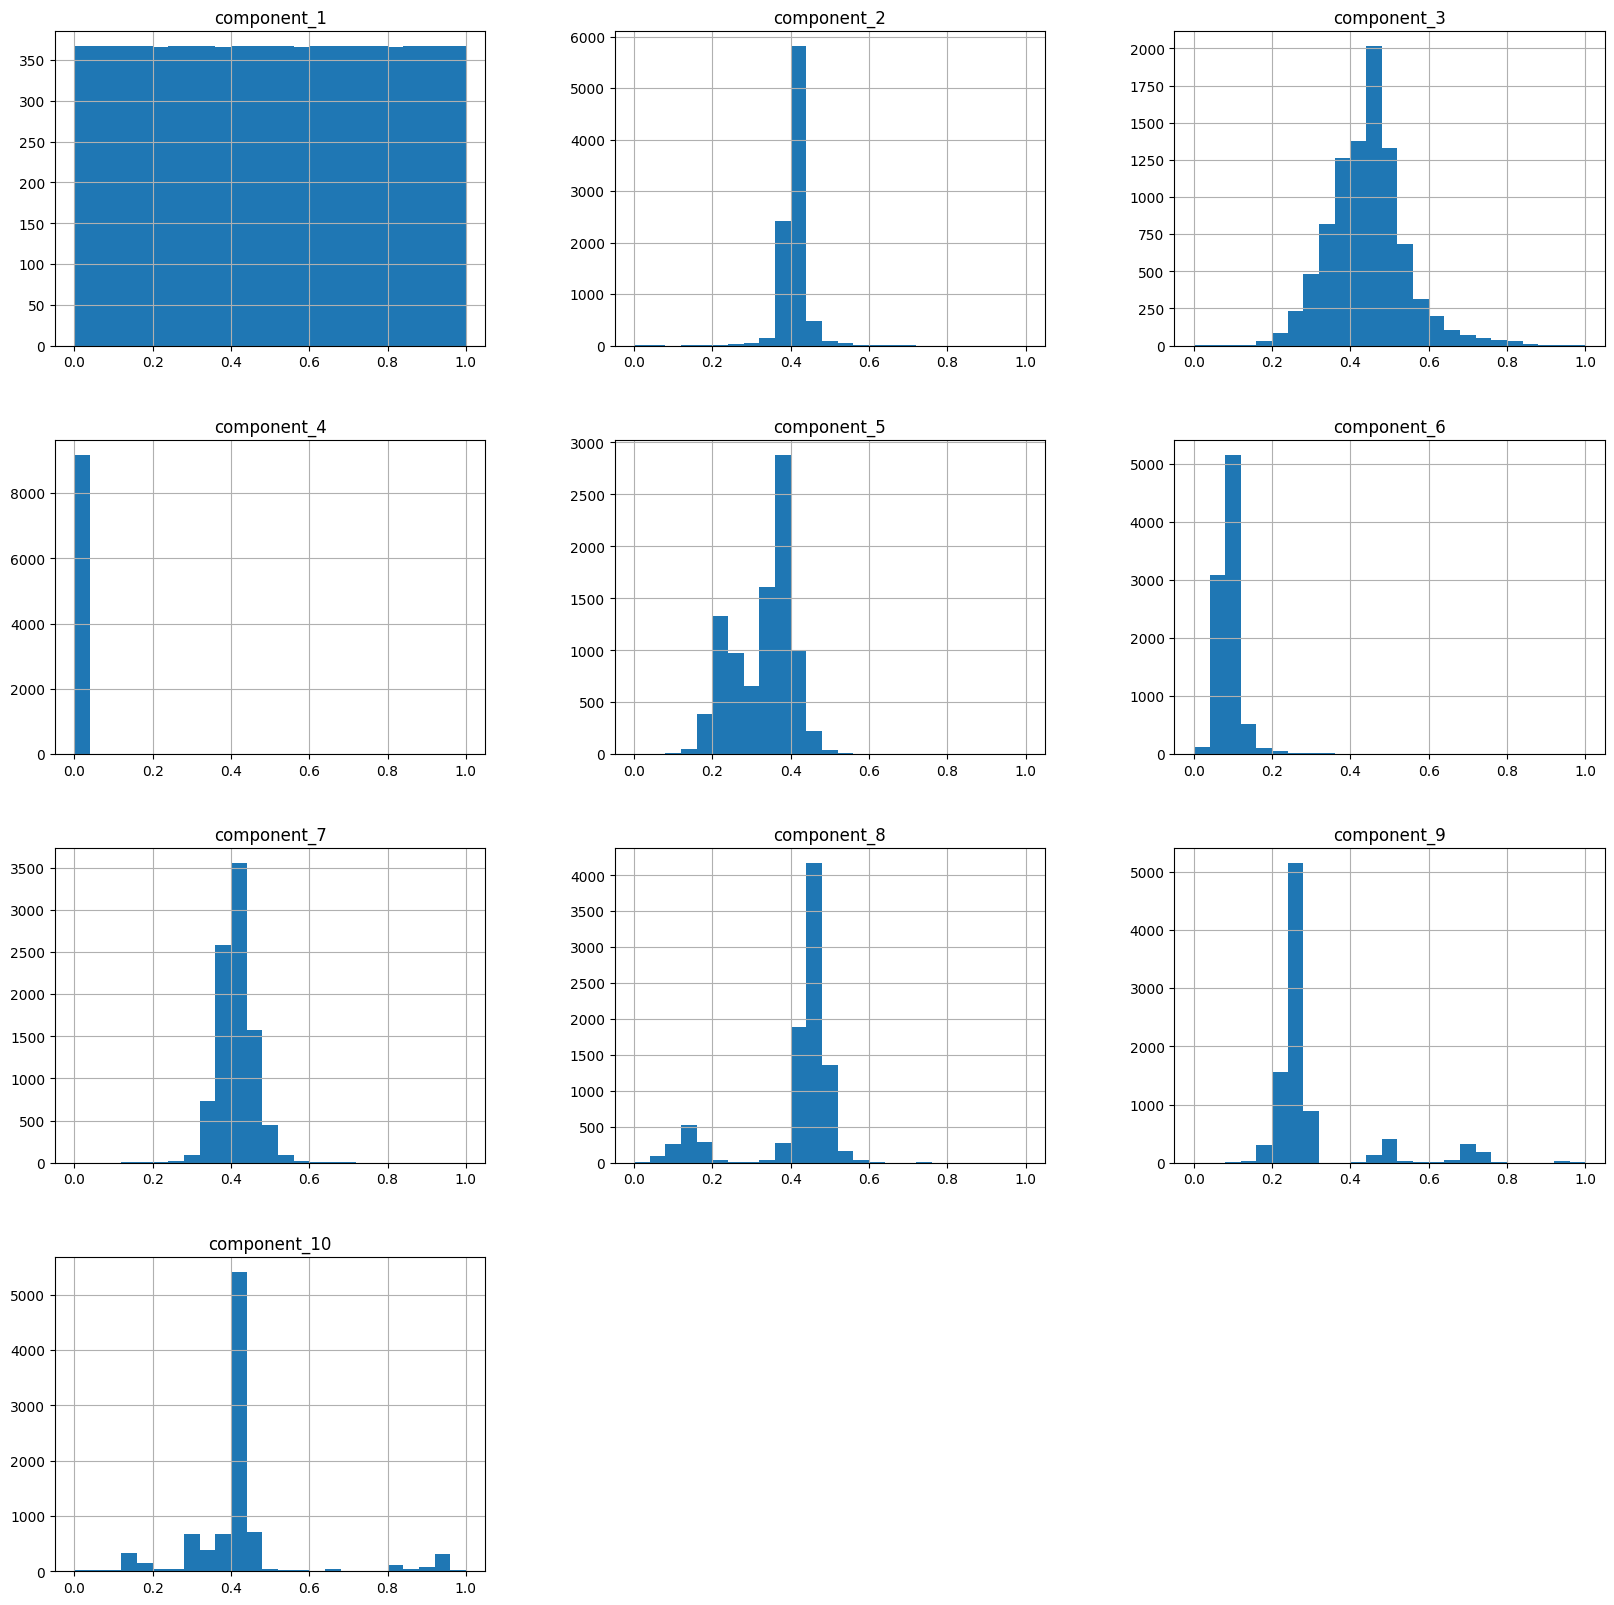

In [16]:
X_pca.hist(bins=25,figsize=(20,20));

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.33,random_state=42)

### **Model Selection**

In [25]:
from sklearn.metrics import accuracy_score


### **Decision Tree Classifier**

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
clf = tree.fit(X_train,y_train)
treepredict = clf.predict(X_test)

In [27]:
accuracy_score(treepredict,y_test)

0.757185332011893

### **Random Forest Classifier**

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2,n_estimators=200)
rclf = rf.fit(X_train,y_train)
rfpred = rclf.predict(X_test)
accuracy_score(rfpred,y_test)

0.7466138090518666

### **KNN Classifier**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(X_train,y_train)
y_pred = knnclf.predict(X_test)

accuracy_score(y_pred,y_test)

0.7713908159894285

### **SVM**

In [31]:
from sklearn.svm import SVC
svm = SVC(kernel="sigmoid")
sclf = svm.fit(X_train,y_train)
y_pred = sclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7324083250743311

### **logisitic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lrclf = lr.fit(X_train,y_train)
y_pred = lrclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7578460521968946

## **Without PCA**

In [33]:
df2.head()

,Unnamed: 0,age,sex,TSH,T3,T4U,FTI,on_thyroxine,sick,query_on_thyroxine,...,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
0,0,-0.037636,0.661579,-0.157026,-9.403722e-02,-1.160597e-15,-3.580169e-16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,-0.027501,0.661579,0.000000,2.956366e-16,-1.160597e-15,-3.580169e-16,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,-0.031724,0.661579,0.000000,2.956366e-16,-1.160597e-15,-3.580169e-16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,-0.035103,0.661579,0.000000,2.956366e-16,-1.160597e-15,-3.580169e-16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,-0.011454,0.661579,0.000000,2.956366e-16,-1.160597e-15,-3.580169e-16,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

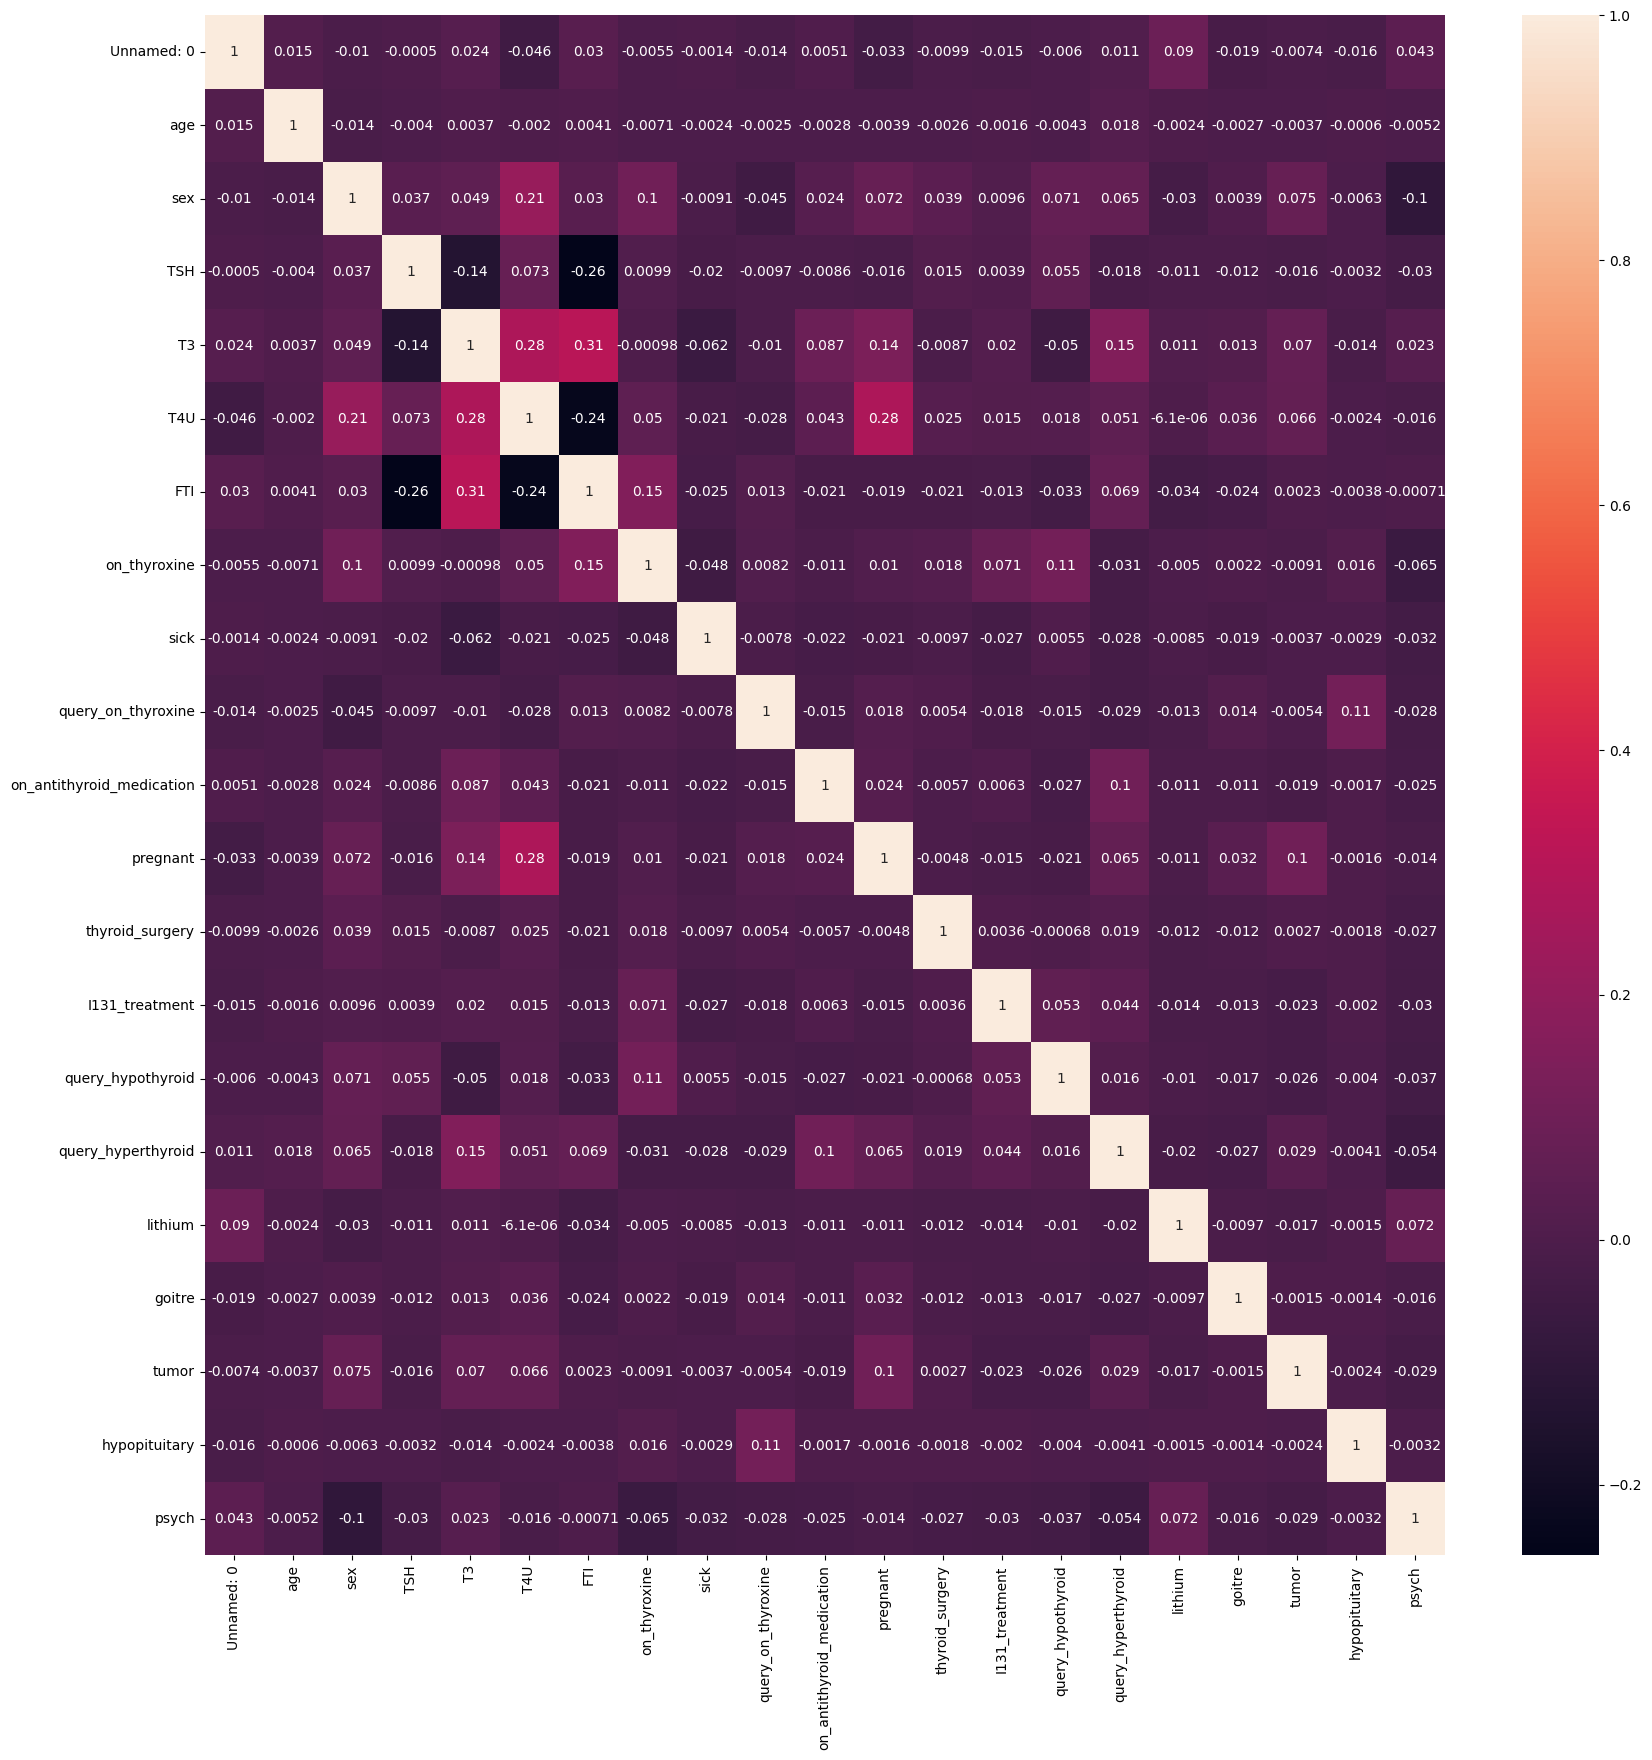

In [34]:

plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True)

In [35]:
# there is no so much correlation
# now we can normalize the value
for i in df2.columns:
    print("\n\n")
    print(i)
    print(df2[i].unique())




Unnamed: 0
[   0    1    2 ... 9168 9169 9170]



age
[-3.76364528e-02 -2.75011176e-02 -3.17241739e-02 -3.51026190e-02
 -1.14535035e-02  2.90488808e-03 -3.84810641e-02 -1.65211711e-02
 -2.66565063e-02 -1.90550049e-02 -3.08795626e-02 -4.86163993e-02
 -2.58118950e-02 -8.91966967e-03 -2.83457288e-02  1.21566555e-03
 -1.48319485e-02  9.66177823e-03 -2.16277952e-03 -5.54122460e-03
 -1.56765598e-02 -1.06088922e-02 -2.32780612e-02 -2.49672838e-02
  7.12794442e-03 -8.07505840e-03 -3.00739079e-03 -3.42580077e-02
 -1.22981147e-02 -1.73657824e-02 -1.82103936e-02 -2.07442274e-02
 -3.25687852e-02 -2.15888387e-02 -3.93256753e-02 -3.85200206e-03
  2.06027682e-03 -4.73556988e-04 -4.69661333e-03 -6.38583587e-03
 -3.67918415e-02  1.21956120e-02 -3.00349514e-02 -1.31427260e-02
 -4.43933429e-02 -2.41226725e-02  7.97255569e-03 -9.76428094e-03
 -4.10148979e-02  1.05063895e-02 -1.31816826e-03 -5.03056218e-02
 -4.94610105e-02 -2.91903401e-02 -4.01702866e-02 -4.52379542e-02
  5.43872189e-03  1.38848346e-02 

In [36]:

cols = ['age','sex','TSH','T3','T4U','FTI']
for i in cols:
    df2[i] = scaler.fit_transform(df2[[i]])

In [37]:
# splitting X and y values

X = df2
y = df['target']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

### **Model Selection**

In [39]:
from sklearn.metrics import accuracy_score

### **Decision Tree**

In [40]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
clf = tree.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.8457218368021143

### **Random Forest Classifier**

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2,n_estimators=200)
rclf = rf.fit(X_train,y_train)
y_pred = rclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7406673273868517

### **K-NN Classifier**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(X_train,y_train)
y_pred = knnclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.6389164188965973

### **SVM**

In [43]:
from sklearn.svm import SVC
svm = SVC(kernel="sigmoid")
sclf = svm.fit(X_train,y_train)
y_pred = sclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.70399735711926

#### **We get the best results while without using the PCA techniques with multiple  features i.e. approximetly 85%.** 

In [46]:
import pickle
pickle.dump(clf, open('Best_model.pkl', 'wb'))